定义世界坐标系下的：小车定位$\begin{bmatrix}{x},{y},{\theta}\end{bmatrix}$，小车线速度和角速度$\begin{bmatrix}v, w\end{bmatrix}$。参考点(reference point)：$\begin{bmatrix}{x_r},{y_r},{\theta_r}\end{bmatrix}$，参考速度：$\begin{bmatrix}v_r, w_r\end{bmatrix}$。  

运动学方程：
$$\begin{align}
\begin{bmatrix} {\dot x} \\ {\dot y} \\ {\dot \theta}\end{bmatrix} =
\begin{bmatrix} {cos\theta} &{0} \\ {sin\theta} &{0} \\ {0} &{1}\end{bmatrix} \cdot
\begin{bmatrix} {v} \\ {w}\end{bmatrix}
\tag{1}\end{align}$$

> Dumitrascu, B., A. Filipescu, and V. Minzu. "Backstepping control of wheeled mobile robots." 15th International Conference on System Theory, Control and Computing. IEEE, 2011.

原文把跟踪误差描述为定位相对于参考点的误差，表示如下：

$$\begin{align}
\begin{bmatrix} {x_e} \\ {y_e} \\ {\theta_e} \end{bmatrix} = 
\begin{bmatrix} {cos\theta_r} &{sin\theta_r} &{0} \\ {-sin\theta_r} &{cos\theta_r} &{0} \\ {0} &{0} &{1}\end{bmatrix} \cdot
\begin{bmatrix} {x - x_r} \\ {y - y_r} \\ \theta - \theta_r\end{bmatrix}
\tag{2}\end{align}$$

展开式(2)：
$$\begin{align}
x_e &=  cos\theta_r \cdot (x - x_r) + sin\theta_r \cdot (y - y_r) \tag{2a} \\
y_e &= -sin\theta_r \cdot (x - x_r) + cos\theta_r \cdot (y - y_r) \tag{2b} \\
\theta_e &= \theta - \theta_r \tag{2c}
\end{align}$$

对式(2)求导：
$$\begin{align}
\dot x_e &= -{\dot \theta_r} \cdot {sin\theta_r} \cdot (x - x_r) + {cos\theta_r} \cdot ({\dot x} - {\dot x_r}) +
             {\dot \theta_r} \cdot {cos\theta_r} \cdot (y - y_r) + {sin\theta_r} \cdot ({\dot y} - {\dot y_r}) \nonumber \\
         &= {w_r} \cdot (-sin\theta_r \cdot (x - x_r) + cos\theta_r \cdot (y - y_r)) + 
            v \cdot cos\theta \cdot cos\theta_r - v_r \cdot (cos\theta_r)^2  +
            v \cdot sin\theta \cdot sin\theta_r - v_r \cdot (sin\theta_r)^2\nonumber \\
         &= -v_r \cdot ((cos\theta_r)^2 + (sin\theta_r)^2) + 
            v \cdot cos(\theta - \theta_r) +
            {w_r} \cdot (-sin\theta_r \cdot (x - x_r) + cos\theta_r \cdot (y - y_r)) \nonumber\\
         &= -v_r + v \cdot cos\theta_e + w_r \cdot y_e
\tag{3a}\end{align}$$

$$\begin{align}
\dot y_e &= -{\dot \theta_r} \cdot cos\theta_r \cdot(x - x_r) - sin\theta_r \cdot (\dot x - \dot x_r) - 
             {\dot \theta_r} \cdot sin\theta_r \cdot (y - y_r) + cos\theta_r \cdot (\dot y - \dot y_r) \nonumber \\
         &= -v \cdot cos\theta \cdot sin\theta_r + v \cdot cos\theta_r \cdot sin\theta_r + v \cdot sin\theta \cdot cos\theta_r - v \cdot sin\theta_r \cdot cos\theta_r 
            -{\dot \theta_r} \cdot (cos\theta_r \cdot (x - x_r) + sin\theta_r \cdot (y - y_r)) \nonumber \\
         &= v \cdot (sin\theta cos\theta_r - cos\theta sin\theta_r) + (v \cdot cos\theta_r sin\theta_r - v \cdot sin\theta_r cos\theta_r)
            -{\dot \theta_r} \cdot (cos\theta_r \cdot (x - x_r) + sin\theta_r \cdot (y - y_r))\nonumber \\
         &= v \cdot sin(\theta - \theta_r) - w_r \cdot x_e \nonumber \\
         &= v \cdot sin\theta_e - w_r \cdot x_e
\tag{3b}\end{align}$$

$$\begin{align}
\dot \theta_e = {\dot \theta - \dot \theta_r} = {w - w_r}
\tag{3c}\end{align}$$

综合上式可得:
$$
\begin{bmatrix} {\dot x_e} \\ {\dot y_e} \\ {\dot \theta_e} \end{bmatrix} =
\begin{bmatrix} {-v_r + v \cdot cos\theta_e + w_r \cdot y_e} \\
                {v \cdot sin\theta_e - w_r \cdot x_e} \\
                {w - w_r} \end{bmatrix}
\tag{3}$$

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 根据式(3)
class ChassisTrackingError(object):
    def __init__(self, err_init=[0., 0., 0.]):
        self._x_e, self._y_e, self._th_e = err_init
    
    def f_state(self, err=[0., 0., 0.], t=0., ref=[1., 1.], u=[1., 1.]):
        x_e, y_e, th_e = err
        v_r, w_r = ref
        v, w = u
        return [-v_r + v * np.cos(th_e) + w_r * y_e,
                v * np.sin(th_e) - w_r * x_e,
                w - w_r]
        
    @property
    def err(self):
        return [self._x_e, self._y_e, self._th_e]
    
err_init = [500., 0., 0.]
chassis_err = ChassisTrackingError()
t_end = 10.
tspan = np.arange(0, t_end, 0.1)
sol = odeint(chassis_err.f_state, err_init, tspan)

#fig, ax = plt.subplots(3, 1)
#ax[0].plot(sol[:,0])
#ax[1].plot(sol[:,1])
#ax[2].plot(np.rad2deg(sol[:,2]))


> Ren C, Ji J H, Yan H Y, et al. A backstepping control method for mobile robot path tracking[C]//3rd Annual International Conference on Mechanics and Mechanical Engineering (MME 2016). Atlantis Press, 2016: 680-687.

同样地，定义误差模型（参考点相对于定位点的误差）：
$$
\begin{bmatrix} {\dot x_e} \\ {\dot y_e} \\ {\dot \theta_e} \end{bmatrix} =
\begin{bmatrix} {w \cdot y_e -v + v_r \cdot cos\theta_e} \\
                {- w \cdot x_e + v_r \cdot sin\theta_e} \\
                {w_r - w} \end{bmatrix}
\tag{4}$$

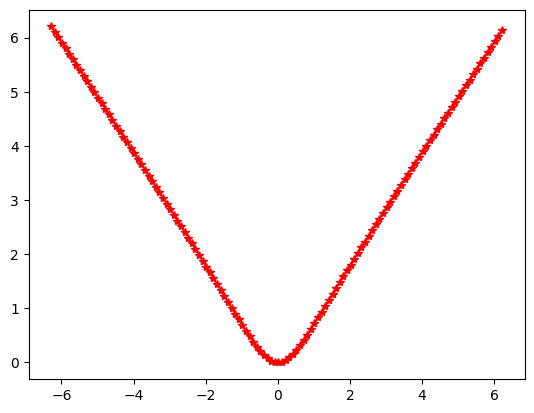

In [33]:
def func(x):
    return x*np.sin(np.arctan(x))

def func1(x):
    return x * x / np.sqrt(1+x**2)

w = np.arange(-2*np.pi, 2*np.pi, 0.1)

#fig, ax = plt.subplots()
#ax.plot(w, func(w))
#ax.plot(w, func1(w), 'r*')